# Challenge: model comparison

You now know two kinds of regression and two kinds of classifier. So let's use that to compare models!

Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [ ]:
### > task: find a dataset - build a KNN Regression model - build a OLS regression model 
### > - do a write up w/a few paragraphs talking about the models and if you favour one...why/why not...did the dataset type have an effect?

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn import neighbors

In [ ]:
# data import
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'ksprojects'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from ksprojects',con=engine)

engine.dispose()

In [34]:
df.head()
pd.DataFrame(df.isnull().sum() * 100 / df.shape[0], columns=["Missing Values %"])

,Missing Values %
id,0.00000
name,0.00000
category,0.00000
main_category,0.00000
deadline,0.00000
goal,0.00000
launched,0.00000
state,0.00000
backers,0.00000
country,0.00000


In [ ]:
# df['usd_pledged'].fillna()

df['usd_pledged'].mean() #7900.242114883215
df['usd_pledged'].median() # 542.0
df['usd_pledged'] = df['usd_pledged'].fillna(value='7900.242114883215')

In [60]:
df['usd_pledged'].isna().sum()  # good to go
df.isnull().sum() # no empty values, good to go

id               0
name             0
category         0
main_category    0
deadline         0
goal             0
launched         0
state            0
backers          0
country          0
usd_pledged      0
currency         0
pledged          0
dtype: int64

In [61]:
df.head(19)

,id,name,category,main_category,deadline,goal,launched,state,backers,country,usd_pledged,currency,pledged
0,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,2009-05-20 21:50:00,300.0,2009-04-30 22:10:30,failed,4,US,40,USD,40.00
1,1100844465,daily digest,Documentary,Film & Video,2009-06-01 02:20:00,700.0,2009-05-04 21:14:28,successful,14,US,700,USD,700.00
2,1316334968,Drive A Faster Car 2.0,Nonfiction,Publishing,2009-06-04 06:00:00,1000.0,2009-05-04 22:51:31,successful,32,US,1367,USD,1367.00
3,1304906577,Accidental to Edinburgh - PHASE 1: AIRFARE,Theater,Theater,2009-06-05 05:59:00,6000.0,2009-04-30 22:22:43,successful,24,US,6575,USD,6575.00
4,1099226462,Logical Guess Pictures' 2nd Horror Movie!,Film & Video,Film & Video,2009-06-06 00:45:00,500.0,2009-04-30 01:32:55,successful,22,US,501.66,USD,501.66
5,1301564845,Anatomy of a Credibility Meltdown — a book abo...,Nonfiction,Publishing,2009-06-15 02:36:00,30000.0,2009-05-11 17:34:54,failed,7,US,490,USD,490.00
6,1081313636,No-bit: An artist book of analog drawings insp...,Illustration,Art,2009-06-15 06:00:00,300.0,2009-05-17 04:53:25,failed,2,US,30,USD,30.00
7,112916020,UNINSURED LA™: Support Health Care Reform,Art,Art,2009-06-15 18:00:00,3000.0,2009-05-26 23:40:46,failed,8,US,370,USD,370.00
8,1130941392,Hand made guitar picks,Crafts,Crafts,2009-06-16 08:45:00,200.0,2009-05-10 09:02:15,failed,3,US,28,USD,28.00
9,1125367305,Meeting Andrei Tarkovsky - Film Website,Documentary,Film & Video,2009-06-21 02:31:00,1250.0,2009-05-30 06:27:42,successful,60,US,2721,USD,2721.00


## Let's do some feature engineering! 

In [99]:
df['country'].nunique() # 22 -- so maybe i'll just predict usd_pledged
df.state.unique() # 6 - ['failed', 'successful', 'canceled', 'suspended', 'undefined', 'live'],

df[df.usd_pledged != 0].shape # 
df[df.state == 'successful'].shape # 
success_projects = df[df.state == 'successful']
success_projects.head(19) #here all projects are successful and I want to predict the usd_pledged 
success_projects = success_projects[success_projects.country == 'US']
success_projects.country.nunique()
success_projects.category.nunique() #156 drop col
success_projects.main_category.nunique() # 15, should be dummied

15

In [110]:
# let's change dtype for columns

success_projects.usd_pledged = success_projects.usd_pledged.astype(float)
success_projects.dtypes
col_drop = ['id', 'name', 'pledged', 'deadline', 'launched', 'state', 'category', 'currency', 'country']
success_projects = success_projects.drop(axis=1, columns=col_drop, errors='ignore')

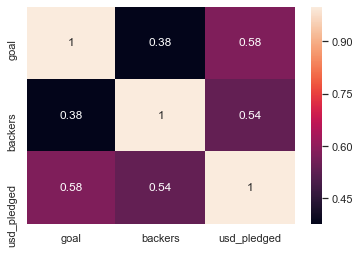

In [124]:
dummy_df = pd.get_dummies(success_projects, columns=['main_category'], drop_first=True)
sns.heatmap(success_projects.corr(), annot=True)
# sns.heatmap(dummy_df.corr(), annot=True)

In [163]:
# X =  dummy_df.drop(columns='usd_pledged')
X =  dummy_df[['goal', 'backers']]
y = dummy_df['usd_pledged']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler() # only perform on training data
scaler.fit(X_train) # never use .fit() method on test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

train_r2 = knn.score(X_train_scaled, y_train)
test_r2 = knn.score(X_test_scaled, y_test)

print(f'Train R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')



Train R^2: 0.62
Test R^2: 0.37


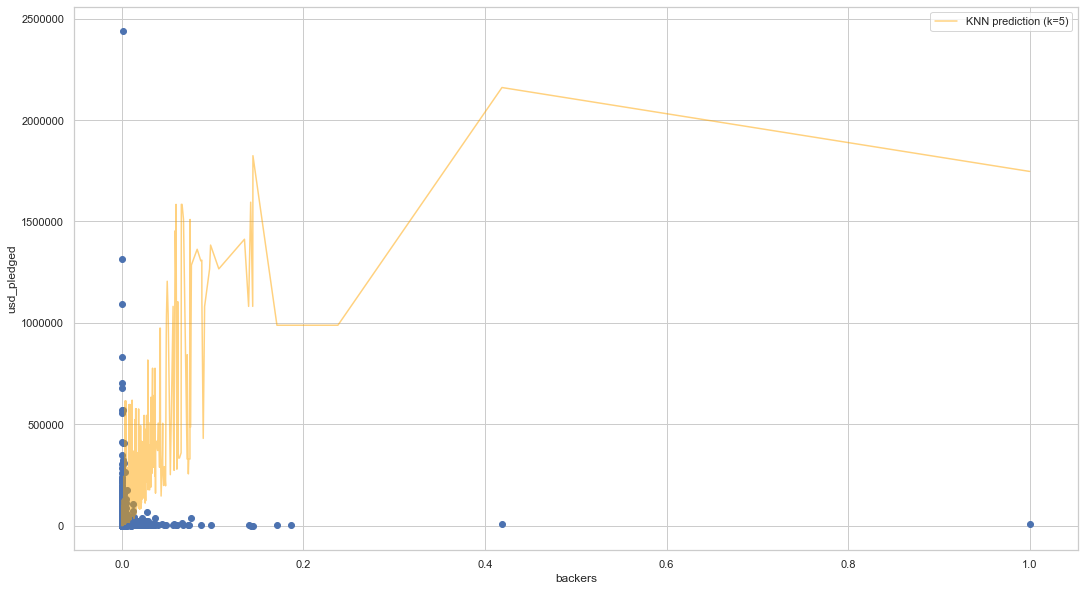

In [164]:
## KNN Regression Plot

# What variable to show in plot
x_name = 'backers'
# What value of k to use in KNN
k = 5

knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

plot_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
plot_df['y_true'] = y_train
plot_df['y_pred'] = knn.predict(X_train_scaled)

# matplotlib freaks out if we don't sort
plot_df = plot_df.sort_values(x_name)

plt.figure(figsize=(18,10))

plt.scatter(plot_df[x_name], plot_df['y_true'])
plt.plot(plot_df[x_name], 
         plot_df['y_pred'], 
         c='orange',
         alpha=0.5,
         label=f'KNN prediction (k={k})')

plt.xlabel(x_name)
plt.ylabel('usd_pledged')
plt.legend()
plt.show()

In [166]:
dummy_df.backers

1          14
2          32
3          24
4          22
9          60
10         23
16         51
17         65
20         10
22         38
24         79
25         19
29        104
31        148
37         56
38         80
39          8
40        176
43         46
45         92
46        163
47         58
48         34
49        108
50         19
53          2
54        181
57          7
58         93
61         46
         ... 
64295       3
64300      71
64301      31
64303     106
64305      71
64308      68
64323     355
64324    4844
64334      96
64339     217
64340      21
64344      32
64349     127
64355      15
64358      33
64361     425
64364      18
64366      46
64367      11
64369      60
64375      17
64378      13
64379      10
64383     109
64392      99
64395     104
64398     610
64403      49
64404     339
64407     224
Name: backers, Length: 19696, dtype: int64

# OLS Model

In [162]:
import statsmodels.api as sm

# X =  dummy_df.drop(columns='usd_pledged')
X =  dummy_df[['goal', 'backers']]
y = dummy_df['usd_pledged']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

# print(results.params)
# print(results.tvalues)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            usd_pledged   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8104.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:33:49   Log-Likelihood:            -2.5341e+05
No. Observations:               19696   AIC:                         5.068e+05
Df Residuals:                   19693   BIC:                         5.068e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8070.7021    712.658    -11.325      0.0

# Conclusion:

Using the OLS model for the predicted values of 'usd_pledged' was defintely less effective.  As is stated above, the 